### Import necessary packages

In [24]:
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib as mpl

### Load the data
Input:

| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of choosen tickers                 |
| start_date | starte date of search in YYY-M-D format |
| end_date   | end of date search in YYYY-M-D format   |

Output: Pandas DataFrame with finance data from Yahoo

In [25]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(1990, 1, 1)
end = datetime(2021, 5, 5)
df = get_data_from_api("MSFT", start, end)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,0.616319,0.598090,0.605903,0.616319,53035200.0,0.391455
1990-01-03,0.626736,0.614583,0.621528,0.619792,113774400.0,0.393661
1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.405239


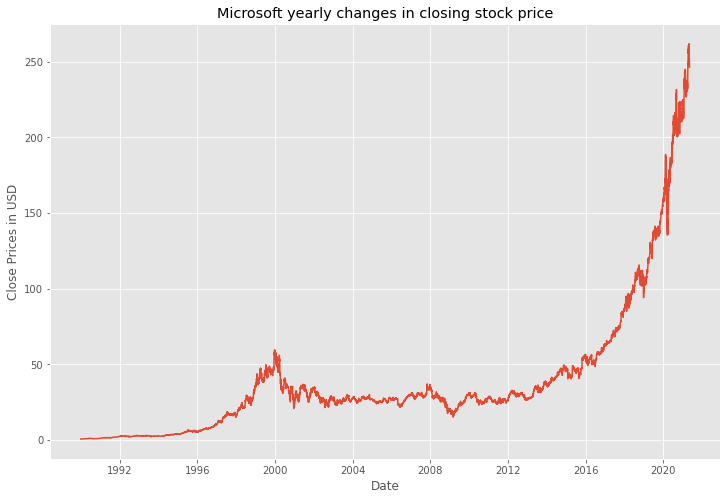

In [48]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices in USD')
plt.plot(df['Close'])
plt.title('Microsoft yearly changes in closing stock price')
plt.show()

### Visualize moving averages
Calculate moving averages based on closing price with a window of 5, 20, 100, and 200 days

In [26]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

Close price VS Moving Average 5/20/100/200 days of MSFT

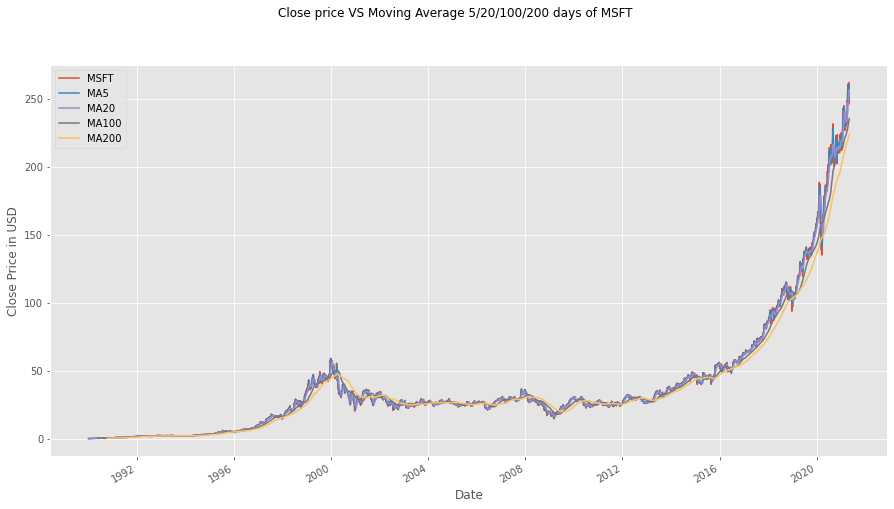

In [27]:
mpl.rc('figure', figsize=(15, 8))
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()

Close price VS Moving Average 5 days of MSFT

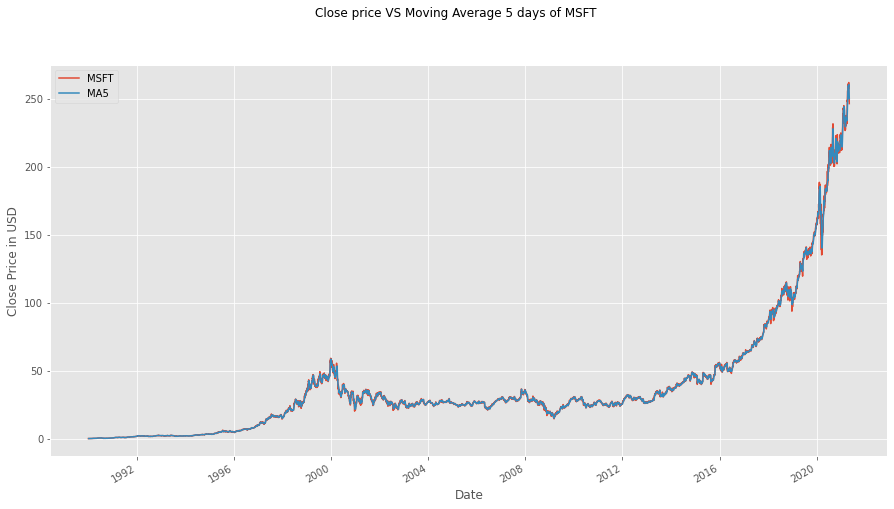

In [28]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5 days of MSFT')
plt.legend()

Close price VS Moving Average 20 days of MSFT

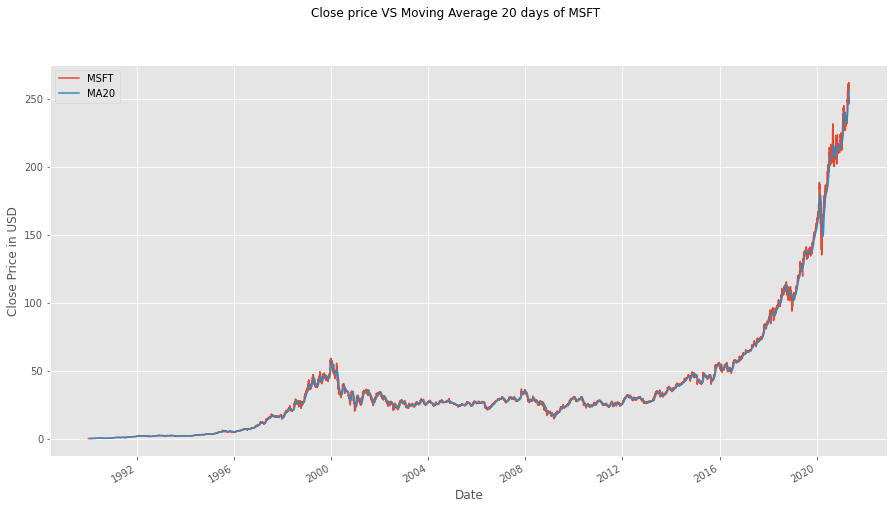

In [29]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA20.plot(label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 20 days of MSFT')
plt.legend()

Close price VS Moving Average 100 days of MSFT

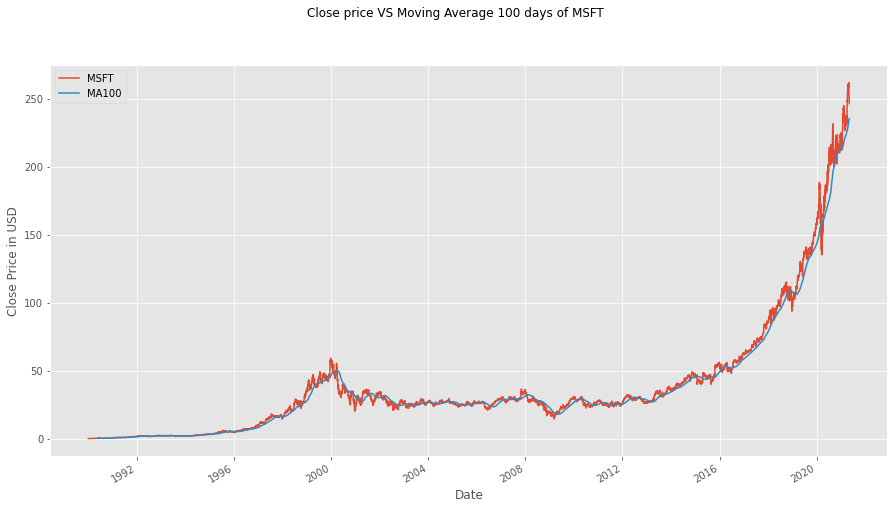

In [30]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA100.plot(label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 100 days of MSFT')
plt.legend()

Close price VS Moving Average 200 days of MSFT

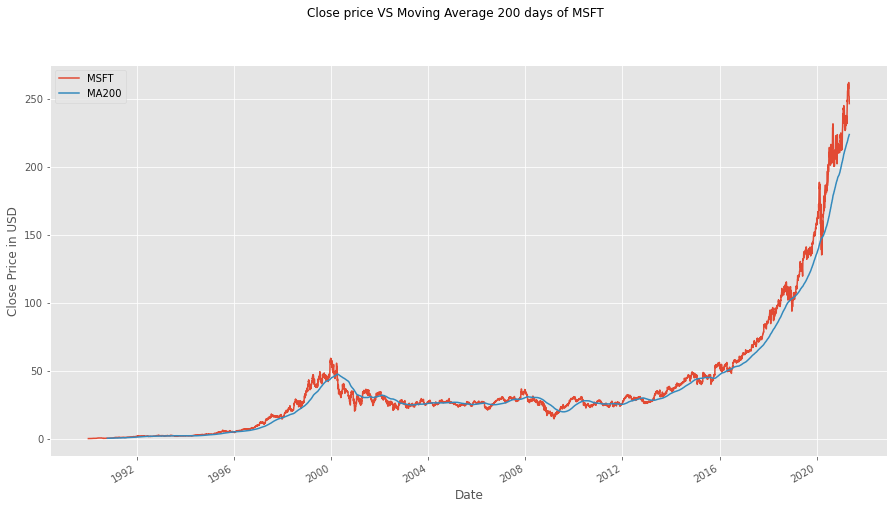

In [31]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 200 days of MSFT')
plt.legend()

### Preprocess data for showing MA in 2020

In [32]:
#Seperate dataframe so we keep original for further exploration
ma_df = df
#Set index as datetime
ma_df.index = pd.to_datetime(ma_df.index)
#Set label by shifting Closing price by -1
ma_df['Label'] = ma_df['Close'].shift(-1)
#Log_r
log_r = np.log(ma_df['Close'] / ma_df['Close'].shift(1))

#Drop non-used columns
ma_df = ma_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Drop NaN values
ma_df = ma_df.dropna()

#Standarizing
ma_df = (ma_df - ma_df.mean())/ma_df.std()

## rolling mean
close_px = ma_df['Close']
ma_df['MA5'] = close_px.rolling(5,min_periods=1).mean()
ma_df['MA20'] = close_px.rolling(20,min_periods=1).mean()
ma_df['MA100'] = close_px.rolling(100,min_periods=1).mean()
ma_df['MA200'] = close_px.rolling(200,min_periods=1).mean()
print(ma_df.tail())

               Close     Label       MA5      MA20     MA100     MA200
Date                                                                  
2021-04-28  4.791727  4.739290  4.896684  4.799576  4.329962  4.083455
2021-04-29  4.746141  4.731961  4.875959  4.818188  4.338472  4.088365
2021-04-30  4.738803  4.724855  4.836067  4.829118  4.346882  4.093273
2021-05-03  4.731688  4.634469  4.792972  4.832220  4.355236  4.098603
2021-05-04  4.641184  4.605155  4.729909  4.832142  4.362303  4.103596


MA5 and close price in 2020

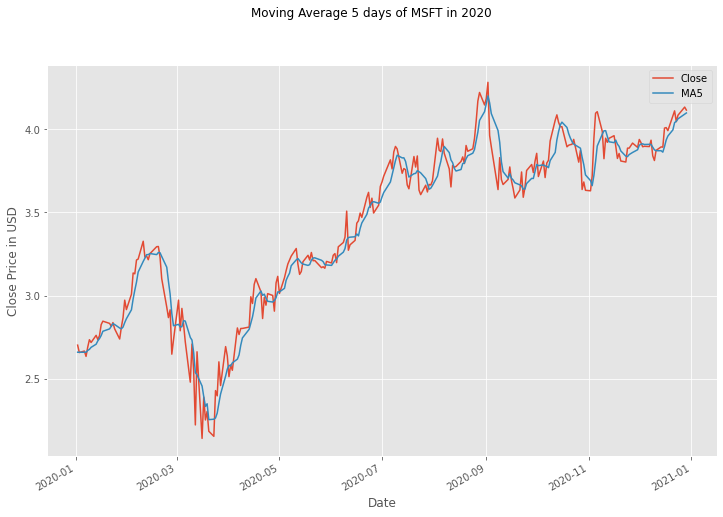

In [33]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA5'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5 days of MSFT in 2020')
plt.legend()


MA20 and close price in 2020

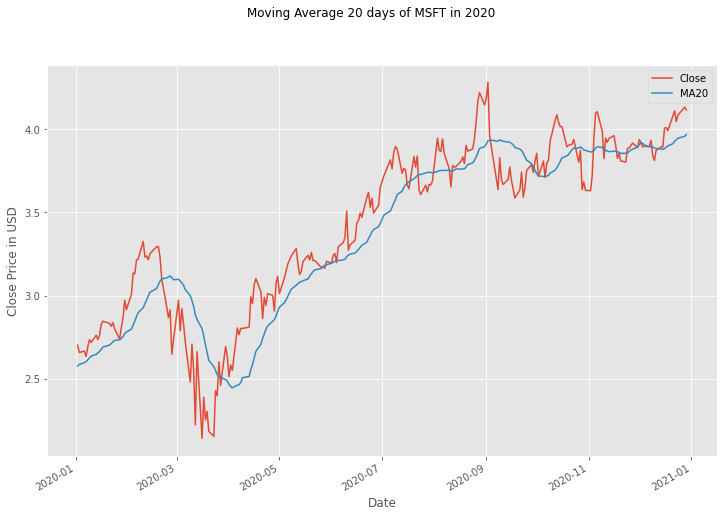

In [34]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA20'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 20 days of MSFT in 2020')
plt.legend()

MA100 and close price in 2020

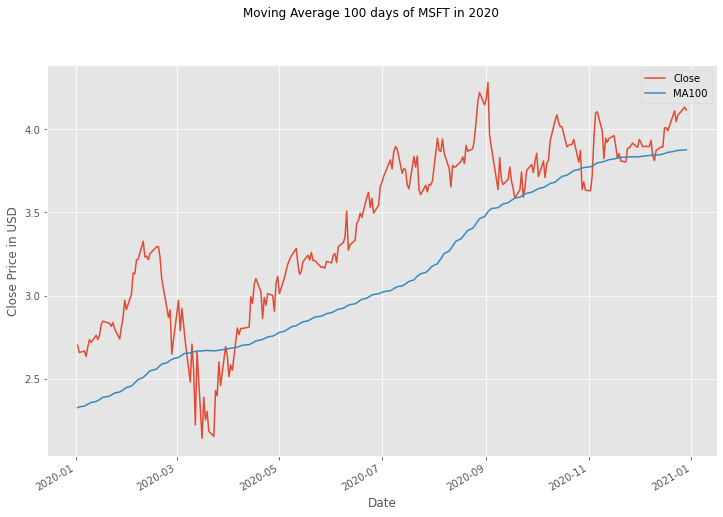

In [35]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA100'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 100 days of MSFT in 2020')
plt.legend()


MA200 and close price in 2020

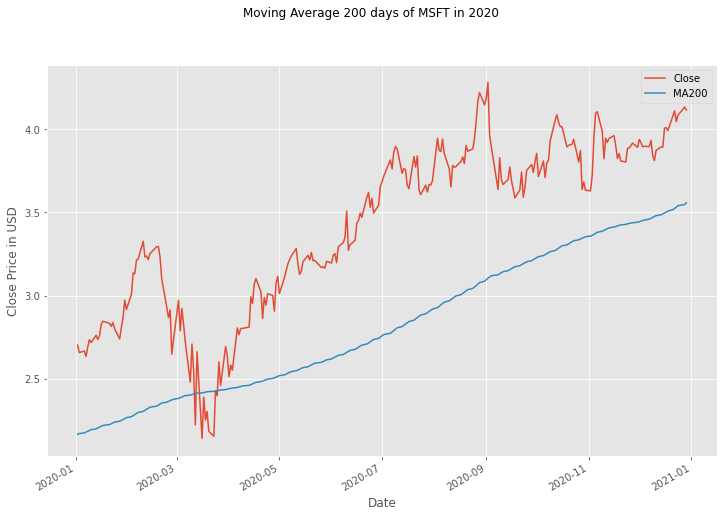

In [36]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA200'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 200 days of MSFT in 2020')
plt.legend()


Plot these four MA values with close price in the same chart

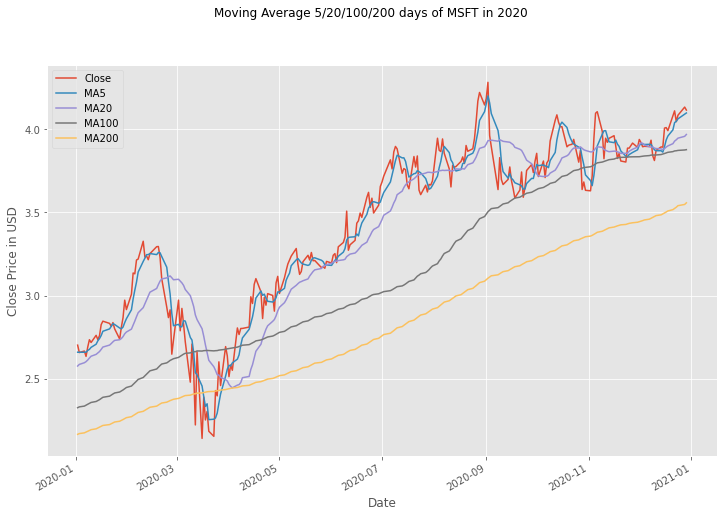

In [37]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df["MA5"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
ma_df["MA20"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
ma_df["MA100"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
ma_df["MA200"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')

plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5/20/100/200 days of MSFT in 2020')
plt.legend()

## Pre-process data function
Since the various models require somewhat different pre-processing a function that handles the various needs is created.

| Argument         | Description                                                  |
|------------------|--------------------------------------------------------------|
| raw_df           | Dataframe input                                              |
| Standarize       | Boolean if the data should be standarized or not             |
| Drop_standard    | Boolean if standard values should be removed or not          |
| calculation      | Array containing which calculations that should be performed |
| calculations []  | MA5, MA20, MIN, MAX, mom, vola                               |

In [38]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set index as datetime
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
        #Creating more features
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(max_roll_window).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(max_roll_window).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(max_roll_window).mean()
            print(max_roll_window)
        if 'vola' in calculations:
            raw_df['vola'] = log_r.rolling(max_roll_window).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df - raw_df.mean())/raw_df.std()
        return raw_df

### Pre-process data for models

In [39]:
proc_df = process_data(df, True, True, ['MA5', 'MA20', 'MIN', 'MAX'])
proc_df.head(10)

,Close,Label,MA5,MA20,MIN,MAX
Date,,,,,,
1990-01-29,-0.856498,-0.856117,-0.857720,-0.862385,-0.859986,-0.864118
1990-01-30,-0.856536,-0.855924,-0.857674,-0.862366,-0.859986,-0.864118
1990-01-31,-0.856343,-0.855731,-0.857619,-0.862340,-0.859986,-0.864118
1990-02-01,-0.856150,-0.855731,-0.857527,-0.862325,-0.859986,-0.864118
1990-02-02,-0.856150,-0.855654,-0.857434,-0.862293,-0.859986,-0.864118
1990-02-05,-0.856073,-0.855693,-0.857349,-0.862268,-0.859986,-0.864118
1990-02-06,-0.856112,-0.855808,-0.857263,-0.862242,-0.859986,-0.864118
1990-02-07,-0.856228,-0.855654,-0.857240,-0.862203,-0.859986,-0.864118
1990-02-08,-0.856073,-0.855616,-0.857225,-0.862142,-0.859986,-0.864118


#### Split data into training and test with a 80-20 split

In [40]:
#Split data
import math
# Array splicing and splitting of data
df_np = proc_df.to_numpy()

X, y = df_np[:, :-1], df_np[:, -1]

# pct split
limit = math.floor(len(X) * 0.8)

X_train, X_test = X[:limit,:],X[limit:,:]

y_train, y_test = y[:limit],y[limit:]


## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)
linear_predictions = model.predict(X_test)
print("Actual: ", y_test[:10])
print("Forecasted: ", linear_predictions[:10])

Actual:  [0.15001834 0.15001834 0.15001834 0.15001834 0.15001834 0.14137454
 0.14115848 0.14115848 0.14115848 0.14115848]
Forecasted:  [0.18831339 0.19036694 0.18463579 0.17826256 0.17431332 0.16159802
 0.15072905 0.14323824 0.13376007 0.132297  ]


<Figure size 1200x640 with 0 Axes>

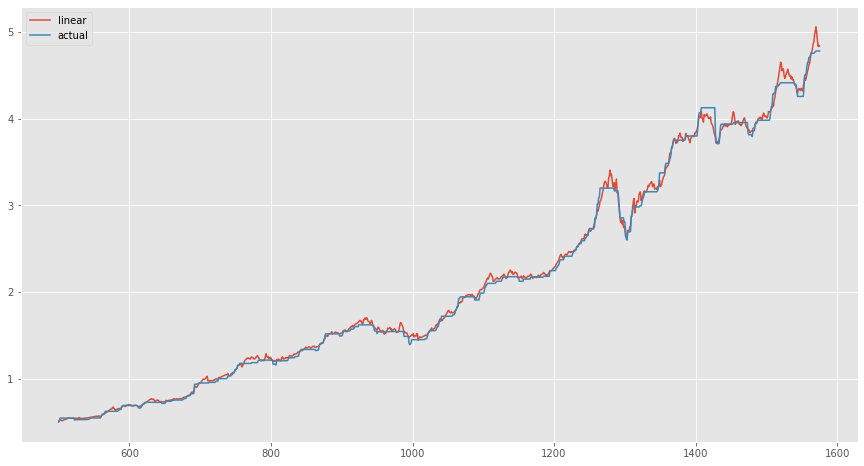

In [42]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = linear_predictions, columns = ["linear"])
df_pred["actual"] = y_test.tolist()
df_pred[500:].plot()
plt.show()

## MLP Regression

In [43]:
from sklearn.neural_network import MLPRegressor
#MLP
rnd_state = 1
max_it = 500
regr = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train, y_train)
print(regr.score(X_train, y_train))
MLPpredictions = regr.predict(X_test)
print(regr.score(X_test, y_test))


0.9952740983059832
0.992460321882265


<Figure size 1200x640 with 0 Axes>

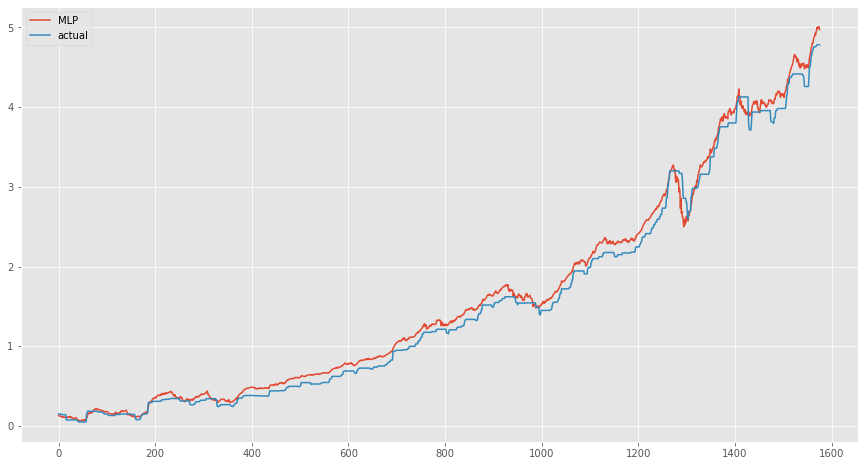

In [44]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = MLPpredictions, columns = ["MLP"])
df_pred["actual"] = y_test.tolist()
df_pred.plot()
plt.show()

## Visualize the prediction of both models

<Figure size 1200x640 with 0 Axes>

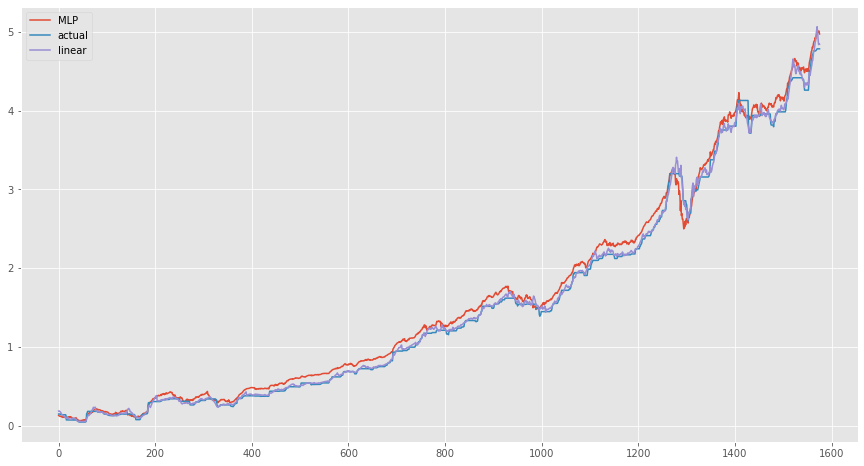

In [45]:
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = MLPpredictions, columns = ["MLP"])
df_pred["actual"] = y_test.tolist()
df_pred["linear"] = linear_predictions.tolist()
df_pred.plot()
plt.show()


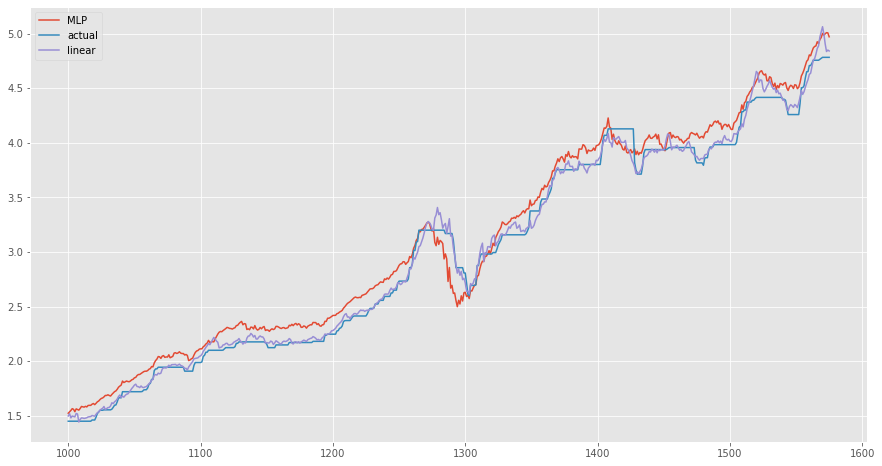

In [46]:
#Show last 350 days
df_pred[1000:].plot()
plt.show()


## ARIMA MODEL

                 Close
Date                  
2021-01-04  217.690002
2021-01-05  217.899994
2021-01-06  212.250000
2021-01-07  218.289993
2021-01-08  219.619995


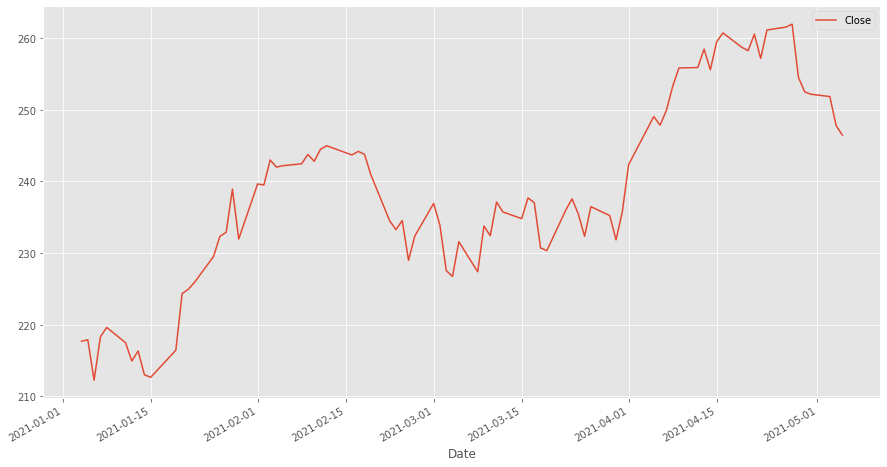

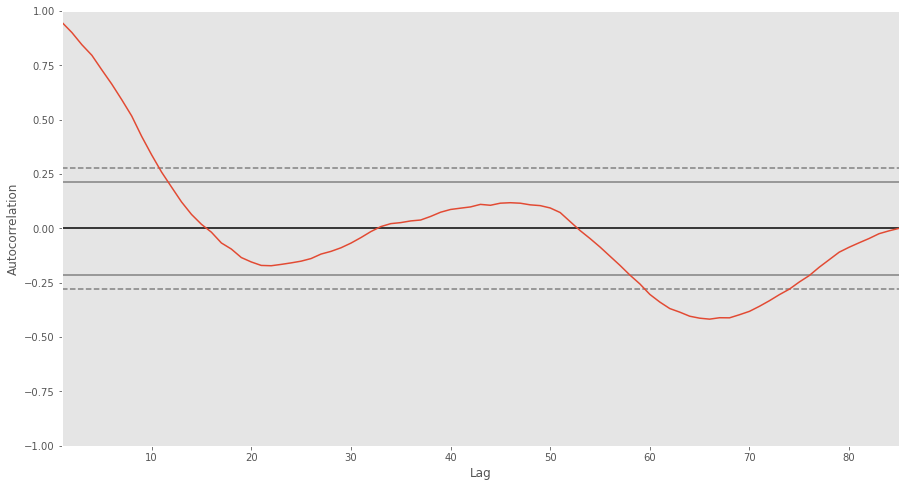

predicted=236.406520, expected=232.339996, test=0.000000
predicted=234.308943, expected=236.479996, test=1.000000
predicted=236.125879, expected=235.240005, test=2.000000
predicted=234.547833, expected=231.850006, test=3.000000
predicted=231.907222, expected=235.770004, test=4.000000
predicted=236.490096, expected=242.350006, test=5.000000
predicted=240.141315, expected=249.070007, test=6.000000
predicted=247.451183, expected=247.860001, test=7.000000
predicted=248.948967, expected=249.899994, test=8.000000
predicted=251.346079, expected=253.250000, test=9.000000
predicted=254.366538, expected=255.850006, test=10.000000
predicted=254.939682, expected=255.910004, test=11.000000
predicted=256.600862, expected=258.489990, test=12.000000
predicted=259.332042, expected=255.589996, test=13.000000
predicted=256.311709, expected=259.500000, test=14.000000
predicted=259.203013, expected=260.739990, test=15.000000
predicted=261.197259, expected=258.739990, test=16.000000
predicted=258.144419, ex

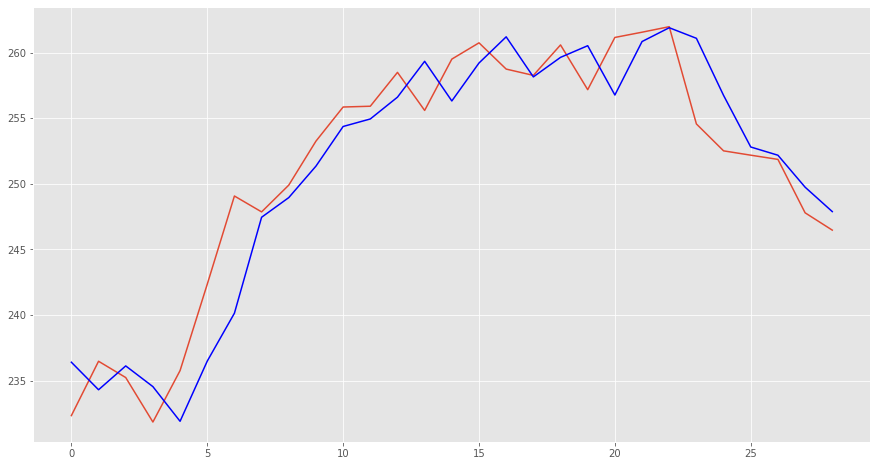

In [47]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

start2 = datetime(2021,1,1)
end2 = datetime(2021,5,5)
arima_df = get_data_from_api("MSFT", start2, end2)

arima_df.head(10)
arima_df = arima_df[['Close']]
print(arima_df.head())
arima_df.plot()
plt.show()

autocorrelation_plot(arima_df)
plt.show()

F = arima_df.values
size = int(len(F) * 0.66)
train, test = F[0:size], F[size:len(F)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, test=%f' % (yhat, obs, t))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()
